In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2


# CV2 Image Processing Library

### Drawing Functions

In [ ]:
img = np.zeros(10000).reshape(100,100)
plt.imshow(img, cmap='gray')
plt.show()

### Circles

In [ ]:
#cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
cv2.circle(img, (50,50), 30, (255,255,255), 2)
plt.imshow(img, cmap='gray')
plt.show()

### Filling Polygons

In [ ]:
#cv2.fillConvexPoly(img, points, color[, lineType[, shift]])
#cv2.fillPoly(img, pts, color[, lineType[, shift[, offset]]]) 
img = np.zeros(10000).reshape(100,100)
cv2.fillConvexPoly(img, np.array([[5,5],[100,20], [60,100],[0, 50],[5,5]]), (255,255,255))
plt.imshow(img, cmap='gray')
plt.show()

### Lines

In [ ]:
#cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
img = np.zeros(10000).reshape(100,100)
cv2.line(img, (5,5), (100,100), (255,255,255))
plt.imshow(img, cmap='gray')
plt.show()

### Rectangles

In [ ]:
#cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
img = np.zeros(10000).reshape(100,100)
cv2.rectangle(img, (5,5), (95,95), (255,255,255))
cv2.rectangle(img, (10,10), (90,90), (255,255,255))
plt.imshow(img, cmap='gray')
plt.show()

### Putting Text

In [ ]:
#cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
img = np.zeros(10000).reshape(100,100)
cv2.putText(img, 'Hello World!', (5, 50), 2, 0.4, (255,255,255))
plt.imshow(img, cmap='gray')
plt.show()

# Manipulating Images

### Loading Image

In [ ]:
img = cv2.imread('./data/bmw.jpg', 0)  #0 for grayscale, 1 for RGB
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Saving Image

In [ ]:
cv2.imwrite('./data/bmwgray.jpg',img)

### Merging Two Images

In [ ]:
img1 = cv2.imread('./data/bmw.jpg', 0)
img2 = cv2.imread('./data/logo.jpeg', 0)

a, b = img2.shape
img1 = img1[:a,:b]

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

plt.imshow(dst, cmap='gray')
plt.show()

### Resizing

In [ ]:
img = cv2.imread('./data/bmw.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,200], [0,1,50]])
dst = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(dst, cmap='gray')
plt.show()

### Rotating Image

In [ ]:
img = cv2.imread('./data/bmw.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap='gray')
plt.show()

### Transforming Image

In [ ]:
img = cv2.imread('./data/template.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[650,50],[50,650]])
pts2 = np.float32([[0,10],[710,10],[50,700]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Cropping Image

In [ ]:
img = cv2.imread('./data/template.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[100,200],[600,200],[100,600],[600,600]])
pts2 = np.float32([[0,0],[700,0],[0,700],[700,700]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(700,700))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Detecting Edges

In [ ]:
img = cv2.imread('data/template.jpg',0)
edges = cv2.Canny(img,100,300)
plt.figure(figsize = (20, 20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Working with 3 corners

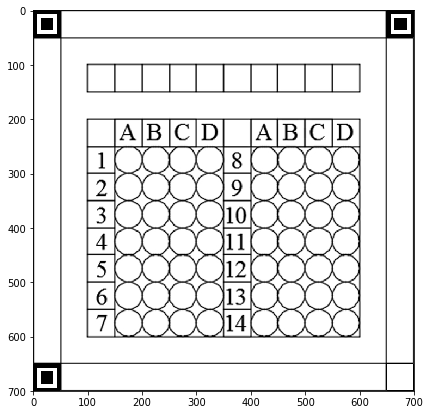

In [2]:
template = cv2.imread('./data/template.jpg', 0)

upper_left = template[:50, :50]
upper_right = template[:50, 650:]
lower_left = template[650:, :50]
lower_right = template[650:, 650:]
upper_left[:, :], upper_right[:, :], lower_left[:, :], lower_right[:, :] = 0, 0, 0, 0
upper_left[7:44, 7:44], upper_right[7:44, 7:44], lower_left[7:44, 7:44], lower_right[1:-1, 1:-1] = 255, 255, 255, 255
upper_left[14:37, 14:37], upper_right[14:37, 14:37], lower_left[14:37, 14:37] = 0, 0, 0

plt.figure(figsize = (7, 7))
cv2.imwrite('./data/template1.jpg', template)
plt.imshow(template, cmap = 'gray')

### Detecting Circles

[[524 324  27]
 [324 524  27]
 [324 374  26]
 [176 324  26]
 [324 324  24]
 [526 376  26]
 [474 324  24]
 [176 376  26]
 [524 524  27]
 [176 526  25]
 [426 276  23]
 [574 376  24]
 [226 524  24]
 [576 324  24]
 [476 378  26]
 [276 276  24]
 [274 472  25]
 [172 476  26]
 [574 524  24]
 [176 572  26]
 [324 574  24]
 [476 576  26]
 [272 428  26]
 [472 472  25]
 [524 474  24]
 [474 524  24]
 [226 322  24]
 [276 378  25]
 [574 474  24]
 [422 324  25]
 [574 424  24]
 [524 574  26]
 [522 274  27]
 [228 278  26]
 [424 374  25]
 [226 376  25]
 [230 424  24]
 [422 428  27]
 [426 472  26]
 [322 476  26]
 [274 526  25]
 [426 528  27]
 [574 274  27]
 [178 276  26]
 [520 426  28]
 [472 274  25]
 [472 428  27]
 [226 474  25]
 [272 578  26]
 [574 578  27]
 [324 424  25]
 [172 426  25]
 [426 572  25]
 [274 324  25]
 [222 572  26]
 [326 272  26]]
56


True

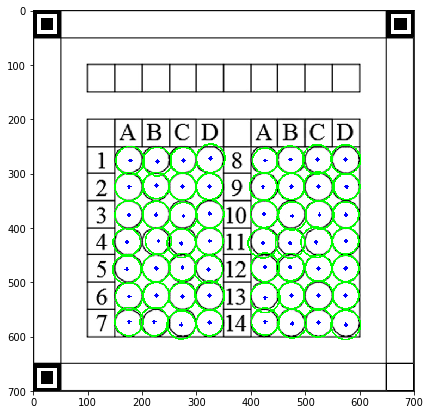

In [3]:
img = cv2.imread('./data/template1.jpg', 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=20, maxRadius=30)

circles = np.uint16(np.around(circles)) # x-col, y-row
print(circles[0])
print(len(circles[0]))
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
    
plt.figure(figsize=(7,7))    
plt.imshow(cimg)
# plt.show()

cv2.imwrite('./data/circle_detected.jpg', cimg)

### Some Helper Functions

In [4]:
import math
import random

def position(x, y):
    d = {1:'A', 2:'B', 3:'C', 4:'D'}
    if x < 350:
        question = math.ceil((y - 250) / 50.0)
        variant = math.ceil((x - 150) / 50.0)
    else:
        question = math.ceil(7 + (y - 250) / 50.0)
        variant = math.ceil((x - 400) / 50.0)
    return question, d[variant]

print(position(325, 325))

def generate_random_solution():
    test = []
    variants = ['A', 'B', 'C', 'D']
    for i in range(1, 15):
        test.append((i, random.choice(variants)))
    return test

print(generate_random_solution())

def coordinate(n, v):
    d = {'A':1, 'B':2, 'C':3, 'D':4}
    if n < 8:
        col = 125 + 50 * d[v]
        row = 225 + 50 * n
    else:
        col = 375 + 50 * d[v]
        row = 225 + 50 * (n - 7)
    return col, row

print(coordinate(12, 'A'))

(2, 'D')
[(1, 'D'), (2, 'A'), (3, 'D'), (4, 'C'), (5, 'C'), (6, 'D'), (7, 'B'), (8, 'B'), (9, 'A'), (10, 'D'), (11, 'C'), (12, 'C'), (13, 'B'), (14, 'B')]
(425, 475)


### Random Solution

True

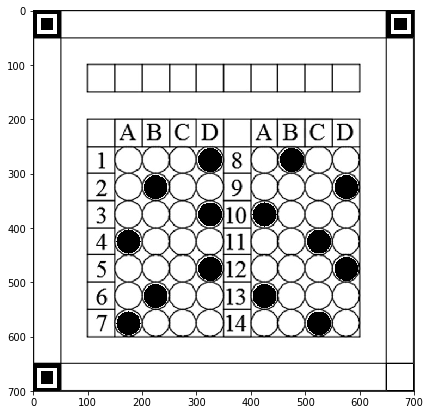

In [6]:
img = cv2.imread('./data/template1.jpg', 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for each in generate_random_solution():
    a, b = coordinate(each[0], each[1])
    cv2.circle(cimg, (a, b), 2, (0, 0, 0), 40)
    
plt.figure(figsize=(7,7))    
plt.imshow(cimg)

cv2.imwrite('./data/circle_answered.jpg', cimg)

### Checking Random Solution

In [7]:
img = cv2.imread('./data/circle_answered.jpg', 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                            param1=50, param2=30, minRadius=20, maxRadius=30)

circles = np.uint16(np.around(circles)) # x-col, y-row

def check(a, b, r):
    array = []
    for j in range(a-r, a+r+1):
        for k in range(b-r, b+r+1):
            if (a-j)**2 + (b-k)**2 <= r**2:
                array.append(img[k, j])
    return np.sum(np.array(array)) / float(len(array))
answers = {}
for i in circles[0]:
    if check(i[0], i[1], i[2]) < 50:
        answers[position(i[0], i[1])[0]] = position(i[0], i[1])[1]
print([(i, answers[i]) for i in range(1, 15)])
# plt.figure(figsize=(7,7))    
# plt.imshow(cimg)

[(1, 'D'), (2, 'B'), (3, 'D'), (4, 'A'), (5, 'D'), (6, 'B'), (7, 'A'), (8, 'B'), (9, 'D'), (10, 'A'), (11, 'C'), (12, 'D'), (13, 'A'), (14, 'C')]


## Three Corners

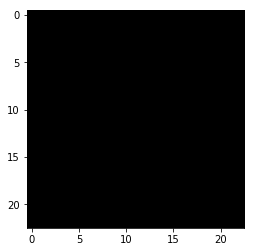

In [8]:
bb = np.zeros((23,23))
plt.imshow(bb, cmap='gray')
cv2.imwrite('./data/black_box.jpg', bb)
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('./data/template1.jpg', 0)
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./data/black_box.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb, cmap='gray')
plt.show()
    
# cv2.imwrite('./data/trying.png', img_rgb)

## Face Detection

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

face_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_eye.xml')

img = cv2.imread('./data/real.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 3)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(20,7))    
plt.imshow(img)
# cv2.imwrite('./data/real_detected.jpg', img)
#     
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

face_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_eye.xml')

img = cv2.imread('./data/barca.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 3)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(20,7))    
plt.imshow(img)
    
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

face_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_eye.xml')

img = cv2.imread('./data/president.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 3)
# print(faces)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# plt.figure(figsize=(20,7))    
# plt.imshow(img)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Video Processing

In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
while(True):

# Capture frame-by-frame
    ret, frame = cap.read()

# Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Display the resulting frame
    face_cascade = cv2.CascadeClassifier('/home/musab/anaconda3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(frame, 1.1, 3)
    # print(faces)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)  
#         roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
    cv2.imshow('frame', gray)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()